#### Mount Google Drive

In [ ]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Import Statements

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import operator
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

#### Load CSV File

In [ ]:
# Assign training and testing data
df_train = pd.read_csv("/content/drive/MyDrive/dataset/kaggle_linear_regression_data/train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/dataset/kaggle_linear_regression_data/test.csv")

# Delete duplicates
df_train = df_train.dropna()
df_test = df_test.dropna()

#### Assign X and Y Variables

In [ ]:
# Prepare data for training
x_train = df_train['x']
y_train = df_train['y']
x_train = x_train.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)

x_test = df_test['x']
y_test = df_test['y']
x_test = x_test.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

#### Plot Training vs. Testing Data

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.scatter(x_train, y_train)
plt.title('Training Set')
plt.subplot(1,2,2)
plt.scatter(x_test, y_test)
plt.title('Testing Set')

#### Polynomial Regression Model (Overfitting Data)

In [ ]:
## train ##

x = x_train
y = y_train

polynomial_features = PolynomialFeatures(degree = 40)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_pred = model.predict(x_poly)

print('Training Error:', mae(y, y_pred), mse(y,y_pred))
print('R2 Score:', model.score(x_poly, y))

plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.scatter(x,y)

# Sort the values of x
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x, y_pred), key=sort_axis)
x, y_pred = zip(*sorted_zip)
plt.plot(x, y_pred, color='m')
plt.title("Training Set")


Testing Error: 17.019353936778213 400.453077195749
R2 Score: 0.5245910073513691


Text(0.5, 1.0, 'Testing Set')

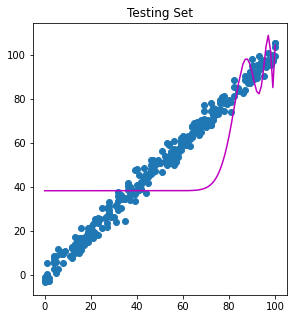

In [ ]:
## test ##

x = x_test
y = y_test

polynomial_features = PolynomialFeatures(degree = 40)
x_poly = polynomial_features.fit_transform(x)
y_pred = model.predict(x_poly)

print('Testing Error:', mae(y, y_pred), mse(y,y_pred))
print('R2 Score:', model.score(x_poly, y))

plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.scatter(x,y)

# Sort the values of x
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x, y_pred), key=sort_axis)
x, y_pred = zip(*sorted_zip)
plt.plot(x, y_pred, color='m')
plt.title("Testing Set")

#### L1 Regularization

Testing Error: 2.4647708169815763 9.75515063651092
R2 Score: 0.988418901985432


Text(0.5, 1.0, 'Testing Set')

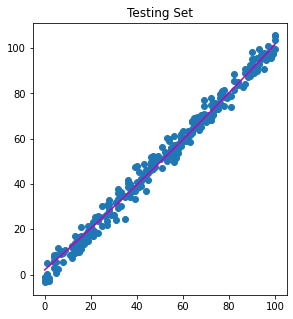

In [ ]:
x = x_test
y = y_test

polynomial_features = PolynomialFeatures(degree = 40)
x_poly = polynomial_features.fit_transform(x)

lasso_model = linear_model.Lasso(alpha=50, max_iter=100, tol=0.1)
lasso_model.fit(x_poly, y)
y_pred = lasso_model.predict(x_poly)

print('Testing Error:', mae(y, y_pred), mse(y,y_pred))
print('R2 Score:', lasso_model.score(x_poly, y))


plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.scatter(x,y)

# Sort the values of x
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x, y_pred), key=sort_axis)
x, y_pred = zip(*sorted_zip)
plt.plot(x, y_pred, color='m')
plt.title("Testing Set")

#### L2 Regularization

In [ ]:
x = x_test
y = y_test

polynomial_features = PolynomialFeatures(degree = 40)
x_poly = polynomial_features.fit_transform(x)

ridge_model = Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_model.fit(x_poly, y)
y_pred = ridge_model.predict(x_poly)

print('Testing Error:', mae(y, y_pred), mse(y,y_pred))
print('R2 Score:', ridge_model.score(x_poly, y))


plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.scatter(x,y)

# Sort the values of x
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x, y_pred), key=sort_axis)
x, y_pred = zip(*sorted_zip)
plt.plot(x, y_pred, color='m')
plt.title("Testing Set")